# Evaluation Based on complete data

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
X = iris.data

In [5]:
y = iris.target

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
log_reg = LogisticRegression()

In [8]:
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [9]:
y_pred = log_reg.predict(X) #store the X predictions in y_pred

In [10]:
print y_pred

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [11]:
print len(y_pred)

150


#  Checking the accuracy

In [12]:
from sklearn import metrics
print metrics.accuracy_score(y,y_pred)

0.96


# Checking for Knn , K = 5

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

In [19]:
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform')

In [20]:
y_pred = knn.predict(X)
print metrics.accuracy_score(y,y_pred)

0.966666666667


# Evaluation Based on train/test split

In [21]:
print X.shape   #X is feature matrix showing 150 observations (rows) and 4 features (columns)
print y.shape   #y is response vector showing 4 response values (0,1,2,3)

(150, 4)
(150,)


In [23]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state = 4)

In [28]:
print X_train.shape
print X_test.shape

(90, 4)
(60, 4)


In [29]:
print y_train.shape
print y_test.shape

(90,)
(60,)


In [31]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)  #fitting logistic regression with training data

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [32]:
y_pred = log_reg.predict(X_test)

print metrics.accuracy_score(y_test,y_pred)

0.95


# Repeat with KNN with K = 5

In [33]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_test,y_test)
y_pred = knn.predict(X_test)
print metrics.accuracy_score(y_test,y_pred)

0.983333333333


# KNN with k = 1

In [34]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print metrics.accuracy_score(y_test,y_pred)

0.95


# Finding the best k

In [59]:
k_range = range(1,26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))
print scores


[0.94999999999999996, 0.94999999999999996, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.98333333333333328, 0.98333333333333328, 0.98333333333333328, 0.98333333333333328, 0.98333333333333328, 0.98333333333333328, 0.98333333333333328, 0.98333333333333328, 0.98333333333333328, 0.98333333333333328, 0.98333333333333328, 0.98333333333333328, 0.96666666666666667, 0.98333333333333328, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.94999999999999996, 0.94999999999999996]


In [42]:
import matplotlib.pyplot as plt

In [44]:
#allows plot to be inside notebook
%matplotlib inline 

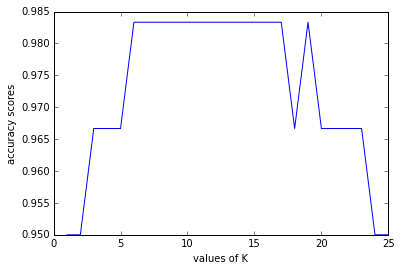

In [60]:
plt.plot(k_range,scores)
plt.xlabel("values of K")
plt.ylabel("accuracy scores")